In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
from pickle import dump
import seaborn as sns
from scipy.stats import skew, boxcox

### Importing Dataset

In [ ]:
dataset = pd.read_csv(r'TrainingData.csv')
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[200 0.1 47352.14884 183 'Other']
 [850 0.1 35043.65892 168 'Tanker']
 [900 8.7 9971.415403 118 'Tanker']
 ...
 [450 12.1 20304.72151 144 'Tanker']
 [1000 8.3 9671.391141 117 'Other']
 [950 11.0 376605.165 333 'Tanker']]


In [ ]:
print(y)

[168.7035839 160.9645315 155.0673376 ... 162.8010216 153.9443544
 185.2974231]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 4] = le.fit_transform(X[:, 4])

In [ ]:
joblib.dump(le, 'labelEncoder.joblib', compress = 9)

['labelEncoder.joblib']

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'box-cox')
X[:, 2:3] = pt.fit_transform(X[:, 2:3])
dump(pt, open('power_transform.pkl', 'wb'))

[200 850 900 ... 450 1000 950]
8.464867619890773e-05


<Figure size 432x288 with 0 Axes>

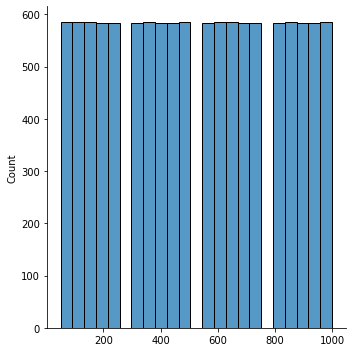

[0.1 0.1 8.7 ... 12.1 8.3 11.0]
0.3095267842848202


<Figure size 432x288 with 0 Axes>

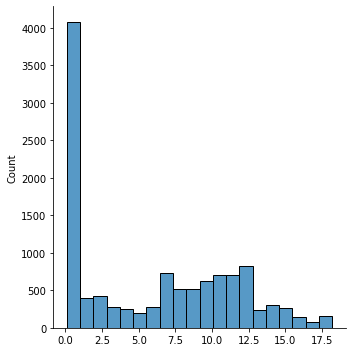

[0.5263196587216614 0.38663965392588956 -0.14604965029815234 ...
 0.14565694585183372 -0.15804387143120577 1.6351739136011292]
-0.11697046438565241


<Figure size 432x288 with 0 Axes>

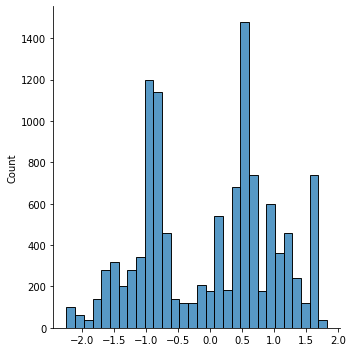

[183 168 118 ... 144 117 333]
0.4024475036632014


<Figure size 432x288 with 0 Axes>

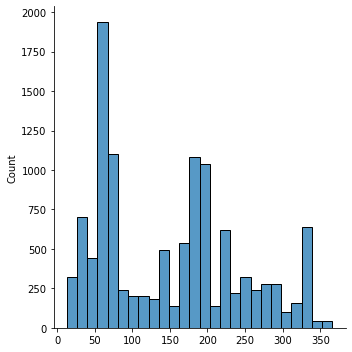

[2 3 3 ... 3 2 3]
-0.3055760235830743


<Figure size 432x288 with 0 Axes>

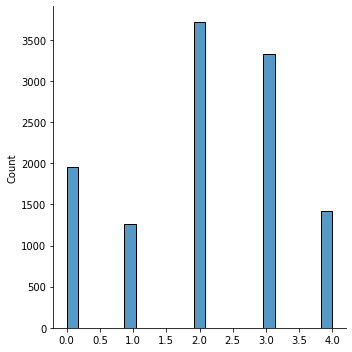

In [ ]:
for col in range(5):
  print(X[:, col])
  print(skew(X[:, col]))

  plt.figure()
  sns.displot(X[:, col])
  plt.show()

### Split dataset for Testing and Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.18, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
dump(sc, open('scaler.pkl', 'wb'))

# Building ANN

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units = 11, activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units = 11, activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units = 11, activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units = 11, activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units = 11, activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

# Training ANN

In [ ]:
ann.compile(optimizer='adam', loss='mean_squared_error' , metrics=['mae'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
300/300 [==============================] - 2s 2ms/step - loss: 12364.4102 - mae: 92.1789
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 594.4306 - mae: 19.7313
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 291.4717 - mae: 13.8620
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 134.1281 - mae: 9.2965
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 70.8067 - mae: 6.5190
Epoch 6/100
300/300 [==============================] - 1s 2ms/step - loss: 44.5237 - mae: 5.0374
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 31.5511 - mae: 4.2039
Epoch 8/100
300/300 [==============================] - 1s 2ms/step - loss: 23.5833 - mae: 3.6063
Epoch 9/100
300/300 [==============================] - 1s 2ms/step - loss: 19.2865 - mae: 3.2022
Epoch 10/100
300/300 [==============================] - 1s 2ms/step - loss: 16.7197 - mae: 2.9530
Epoch 11/100
300/300

In [ ]:
ann.save('my_model.h5')

In [ ]:
print(ann.predict(sc.transform([[50, 2.6, pt.transform([[2323.545]]), 70, 3]])))

[[156.80243]]


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
y_pred = ann.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[181.36408997 181.0199012 ]
 [146.89976501 146.3140024 ]
 [164.27619934 163.0088175 ]
 ...
 [170.77241516 179.2047451 ]
 [175.24186707 174.8676977 ]
 [152.61491394 151.7358576 ]]


In [ ]:
y_pred2 = ann.predict(X_train)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_train.reshape(len(y_train),1)),1))

[[182.93778992 182.1155302 ]
 [165.77012634 165.0097531 ]
 [148.05566406 147.5233383 ]
 ...
 [148.86035156 148.5277063 ]
 [181.7144928  183.8768225 ]
 [152.80932617 152.0401082 ]]


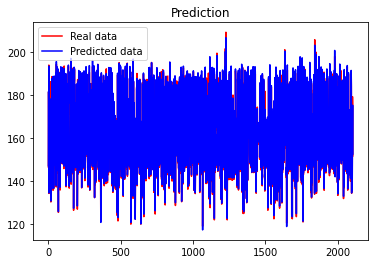

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
diff_1 = 0
diff_3 = 0
diff_5 = 0
diff_9 = 0
diff_14 = 0
diff_18 = 0
diff_G = 0

In [ ]:
for i in range(len(y_pred)):
  diff = abs(y_pred[i][0] - y_test[i])
  if(diff <= 1):
      diff_1 += 1
  elif(diff <= 3):
      diff_3 += 1
  elif(diff <= 5):
      diff_5 += 1
  elif(diff <= 9):
      diff_9 += 1
  elif(diff <= 14):
      diff_14 += 1
  elif(diff <= 18):
      diff_18 += 1
  else:
      diff_G += 1

In [ ]:
print(len(y_pred))
print(diff_1)
print(diff_3)
print(diff_5)
print(diff_9)
print(diff_14)
print(diff_18)
print(diff_G)

2105
1405
601
38
50
11
0
0


In [ ]:
train_loss = ann.evaluate(X_train, y_train)
print(train_loss)

300/300 [==============================] - 1s 1ms/step - loss: 2.9657 - mae: 1.1057
[2.9656729698181152, 1.1057239770889282]
